Epoch 1/50
84/84 [==============================] - 18s 147ms/step - loss: 0.7180 - accuracy: 0.5283 - val_loss: 0.6521 - val_accuracy: 0.6254
Epoch 2/50
84/84 [==============================] - 11s 135ms/step - loss: 0.6608 - accuracy: 0.6095 - val_loss: 0.5762 - val_accuracy: 0.7124
Epoch 3/50
84/84 [==============================] - 11s 128ms/step - loss: 0.5852 - accuracy: 0.6882 - val_loss: 0.4139 - val_accuracy: 0.8896
Epoch 4/50
84/84 [==============================] - 11s 126ms/step - loss: 0.4994 - accuracy: 0.7597 - val_loss: 0.3778 - val_accuracy: 0.8896
Epoch 5/50
84/84 [==============================] - 12s 137ms/step - loss: 0.3976 - accuracy: 0.8241 - val_loss: 0.2757 - val_accuracy: 0.8629
Epoch 6/50
84/84 [==============================] - 11s 125ms/step - loss: 0.3040 - accuracy: 0.8700 - val_loss: 0.2192 - val_accuracy: 0.9197
Epoch 7/50
84/84 [==============================] - 11s 125ms/step - loss: 0.2374 - accuracy: 0.9091 - val_loss: 0.1395 - val_accuracy: 0.9565

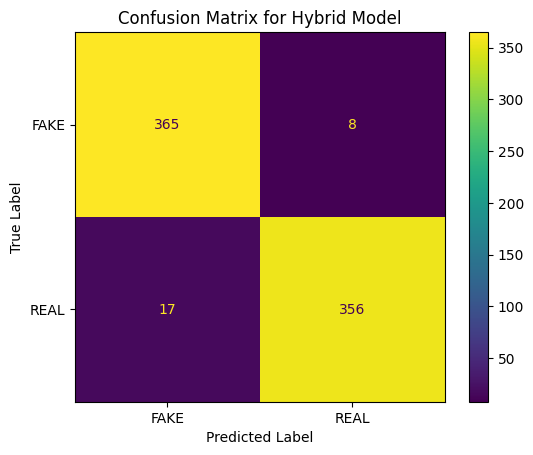

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load dataset
file_path = "C:\\Users\\HP\\Downloads\\NEWS.csv"
data = pd.read_csv(file_path)

# Preprocess text data
data['text'] = data['text'].apply(lambda x: x.lower() if pd.notna(x) else "")

# Encode labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
num_classes = len(label_encoder.classes_)

# Prepare data for training
x = data['text']
y = to_categorical(data['label'], num_classes=num_classes)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Tokenization
max_words = 10000  
max_sequence_length = 100  
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# Padding sequences
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length)
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_sequence_length)

# Define hybrid model
embedding_dim = 100  
RNN_units = 128
MLP_units = 64

def build_hybrid_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(SimpleRNN(units=RNN_units, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(MLP_units, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train model
model = build_hybrid_model()
epochs = 50
batch_size = 32

model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate model
y_pred = model.predict(x_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix for Hybrid Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [3]:
# Save the trained model in .h5 format
model.save("hybrid_model.h5")
print("Model saved successfully as 'hybrid_model.h5'")


Model saved successfully as 'hybrid_model.h5'


In [4]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
print("Tokenizer saved successfully as 'tokenizer.pkl'")


Tokenizer saved successfully as 'tokenizer.pkl'


In [5]:
# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print("Label encoder saved successfully as 'label_encoder.pkl'")


Label encoder saved successfully as 'label_encoder.pkl'


In [6]:
from tensorflow.keras.models import load_model

# Load model
model = load_model("hybrid_model.h5")

# Load tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Load label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

print("Model, tokenizer, and label encoder loaded successfully!")


Model, tokenizer, and label encoder loaded successfully!


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


model = tf.keras.models.load_model(r"C:\Users\HP\mlpbirnn.h5")
print("Model Loaded Successfully!")


file_path = r"C:\Users\HP\Downloads\NEWS.csv"  # Update if needed
data = pd.read_csv(file_path)
data = data.dropna()  # Remove missing values
data['text'] = data['text'].apply(lambda x: x.lower())  # Convert text to lowercase


from sklearn.model_selection import train_test_split

x = data['text']
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


max_words = 10000  
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)  


def predict_news(news_article):
    news_article = news_article.lower()
    sequence = tokenizer.texts_to_sequences([news_article])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    prediction = model.predict(padded_sequence)
    predicted_class = np.argmax(prediction, axis=1)[0]

    label_mapping = {0: "Fake", 1: "Real"}
    return label_mapping.get(predicted_class, "Unknown")


news_text = input("Enter the news article: ")
prediction = predict_news(news_text)
print("\n📰 Predicted Label:", prediction)


✅ Model Loaded Successfully!


Enter the news article:  An old video of a pod of whales swimming alongside of what appears to be a vessel has resurfaced with claims that it is from the Mumbai High Field (Bombay High) an offshore oilfield located 176 km off the coast of Mumbai.  The breathtaking video captures at least five humpback whales, a few among them spouting water, as people onboard the vessel remain awestruck. The video is being erroneously identified as shot in the oilfield (managed by Oil and Natural Gas Corporation) in the backdrop of the lockdown that was announced on March 24, to prevent the transmission of the novel Coronavirus.  Following the lockdown and the ensuing restricted movement in the country, multiple unrelated photos and videos of animals have surfaced with narratives that the wildlife is reclaiming their habitats.  The video is viral on both Facebook and Twitter with the caption, "Whales spotted at Bombay high oil rig!!!'' One such Facebook post is archived here.    Many have questioned th

1/1 [==============================] - 0s 298ms/step

📰 Predicted Label: Fake


In [5]:
import tensorflow as tf

# Load the saved model from the correct path
model = tf.keras.models.load_model(r"C:\Users\HP\mlpbirnn.h5")

print("Model Loaded Successfully!")


Model Loaded Successfully!
